In [5]:
import xarray as xr

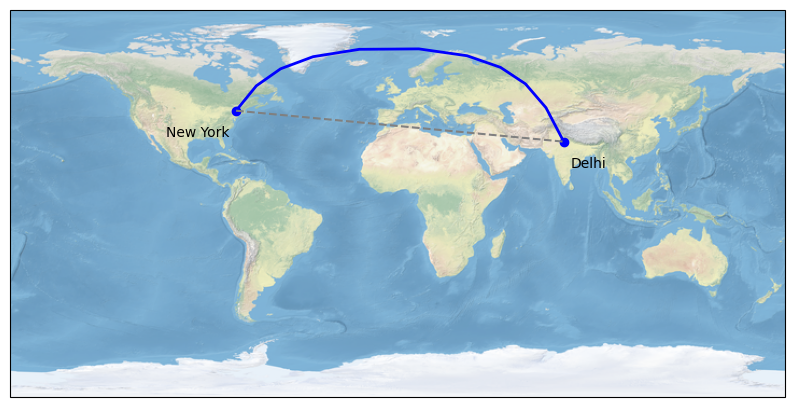

In [121]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt\

plt.figure(figsize=(10, 10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

In [14]:
dataset = xr.open_dataset("data/HadCRUT.5.0.2.0.analysis.anomalies.1.nc")


In [18]:

dataset

<xarray.Dataset> Size: 43MB
Dimensions:         (time: 2089, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 17kB 1850-01-16T12:00:00 ... 2024-0...
  * latitude        (latitude) float64 288B -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude       (longitude) float64 576B -177.5 -172.5 ... 172.5 177.5
    realization     int64 8B ...
Dimensions without coordinates: bnds
Data variables:
    tas             (time, latitude, longitude) float64 43MB ...
    time_bnds       (time, bnds) datetime64[ns] 33kB ...
    latitude_bnds   (latitude, bnds) float64 576B ...
    longitude_bnds  (longitude, bnds) float64 1kB ...
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      Data set built at: 2024-02-27T15:32:53+00:00
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.2.0 HadSST.4.0.1.0
    title:        HadCRUT.5.0.2.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.2.0
    Conventions:  CF-1.7

In [29]:
print(dataset['tas'][0][0][0])

<xarray.DataArray 'tas' ()> Size: 8B
[1 values with dtype=float64]
Coordinates:
    time         datetime64[ns] 8B 1850-01-16T12:00:00
    latitude     float64 8B -87.5
    longitude    float64 8B -177.5
    realization  int64 8B ...
Attributes:
    long_name:     blended air_temperature_anomaly over land with sea_water_t...
    units:         K
    cell_methods:  area: mean (interval: 5.0 degrees_north 5.0 degrees_east) ...


In [169]:
?dataset.tas

Type:        DataArray
String form:
<xarray.DataArray 'tas' (time: 2089, latitude: 36, longitude: 72)> Size: 43MB
           array([[[      nan, <...> units:         K
           cell_methods:  area: mean (interval: 5.0 degrees_north 5.0 degrees_east) ...
Length:      2089
File:        ~/miniconda3/envs/hc_analysis/lib/python3.12/site-packages/xarray/core/dataarray.py
Docstring:  
N-dimensional array with labeled coordinates and dimensions.

DataArray provides a wrapper around numpy ndarrays that uses
labeled dimensions and coordinates to support metadata aware
operations. The API is similar to that for the pandas Series or
DataFrame, but DataArray objects can have any number of dimensions,
and their contents have fixed data types.

Additional features over raw numpy arrays:

- Apply operations over dimensions by name: ``x.sum('time')``.
- Select or assign values by integer location (like numpy):
  ``x[:10]`` or by label (like pandas): ``x.loc['2014-01-01']`` or
  ``x.sel(time='2014-01

/var/folders/6h/551zl8_j7cb0p32k60z_pnc80000gn/T/ipykernel_12856/455945255.py:19: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  year_mean.drop("realization")
/var/folders/6h/551zl8_j7cb0p32k60z_pnc80000gn/T/ipykernel_12856/455945255.py:19: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  year_mean.drop("realization")
/var/folders/6h/551zl8_j7cb0p32k60z_pnc80000gn/T/ipykernel_12856/455945255.py:19: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  year_mean.drop("realization")
/var/folders/6h/551zl8_j7cb0p32k60z_pnc80000gn/T/ipykernel_12856/455945255.py:19: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  year_mean.drop("realization")


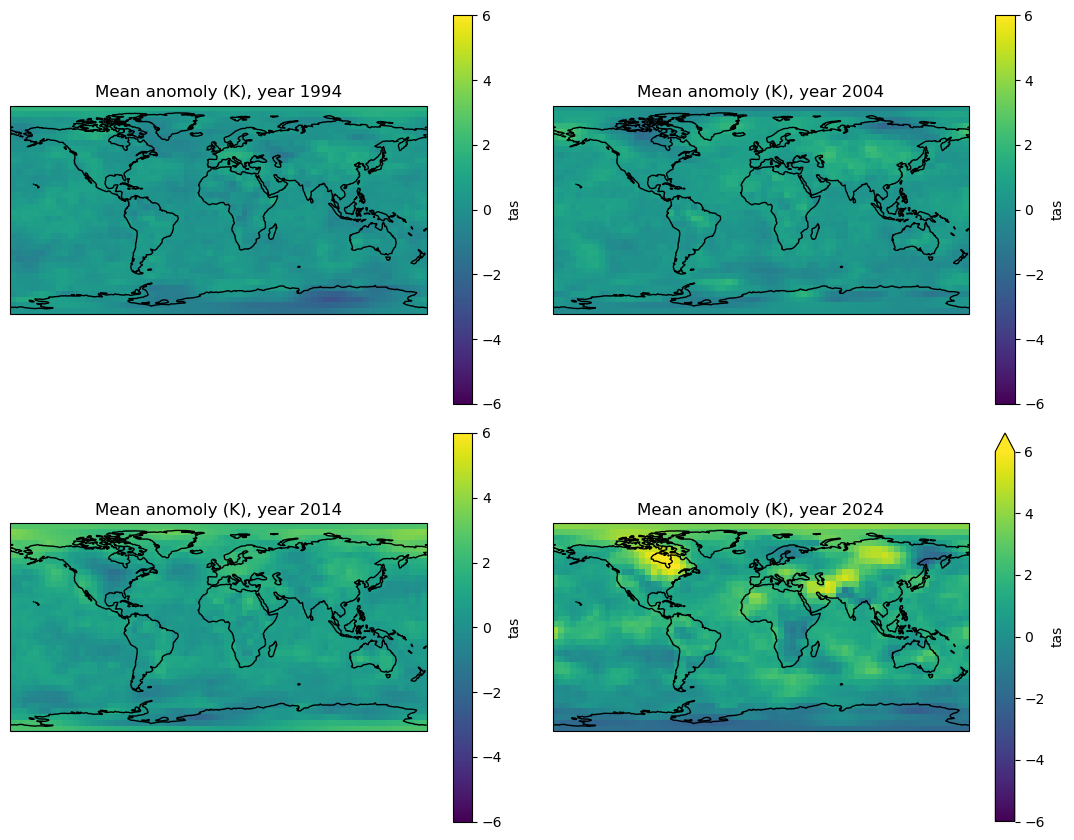

In [225]:

# one_date = dataset.tas.sel(time='2024', method='nearest').mean()

nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

years = ["1994", "2004", "2014", "2024"]

axes_i = 0
for year in years:
    year_start = year + "-01-01"
    year_end = year + "-12-31"
    year_slice = slice(year_start, year_end)
    year_xa = dataset.tas.sel(time=year_slice)
    year_mean = year_xa.mean(dim="time")
    year_mean.drop("realization")
    # print(year_mean)
    ax = axes.flat[axes_i]
    year_mean.plot(ax=ax, vmin=-6, vmax=6)
    ax.set_title(f"Mean anomoly (K), year {year}")
    # plt.colorbar().clim([-6, 6]);
    
    
    axes_i += 1




for ax in axes.flat:
    ax.coastlines()
    # cs=ax.contourf(lons,ds['lat'],data,clevs,
    #                   transform = ccrs.PlateCarree(),
    #                   cmap='coolwarm',extend='both')

plt.tight_layout()


ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._axes.Axes'>

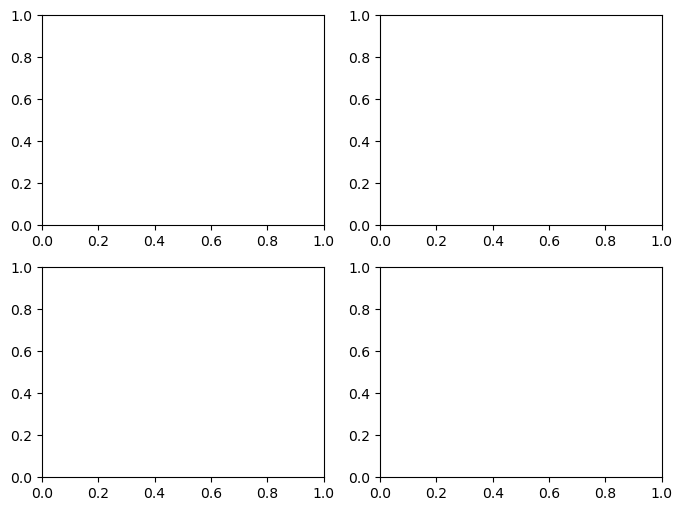

In [174]:
# def get_points(year_start):

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))
one_date.plot(ax=ax1, cbar_kwargs={"label": "K"}, transform=ccrs.PlateCarree())

    
# one_date = dataset.tas.sel(time='2024', method='nearest')
# print(one_date)
anoms = []
lats = []
longs = []
for lat_da in one_date:
    for long_da in lat_da:
        anom = long_da.item()
        lat = long_da.latitude.item()
        long = long_da.longitude.item()

        anoms.append(anom)
        lats.append(lat)
        longs.append(long)


fig, axes = plt.subplots(2, 2)


axes.flat

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.scatter(longs, lats, c=anoms, s=20, marker='s')

        
# print(f"{one_date.values=}")
# print(f"{one_date.dims=}")
# print(f"{one_date.coords=}")
# print(f"{one_date.attrs=}")
# print(f"{one_date.time=}")
# print(f"{one_date.latitude=}")
# print(f"{one_date.longitude=}")
# one_date.values.shape
# x = one_date.longitude.values
# x = x[::2]

# y = one_date.latitude.values
# anomolies = one_date.values

# ax = plt.axes(projection=ccrs.PlateCarree())
# ax.coastlines()

# print([len(anom), len(y), len(x)])
# for anom, lat, long in zip(anomolies, y, x):
#     print(anom, lat, long)


# plt.scatter(x, y)

# # Save the plot by calling plt.savefig() BEFORE plt.show()
# plt.savefig('coastlines.pdf')
# plt.savefig('coastlines.png')

# plt.show()

# print(f"{x}")
# print(f"{y}")
# print(f"{anomolies}")
